In [ ]:
# prompt: drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
pip install kaggle

In [ ]:
# prompt: import kagglehub
# # Download latest version
# path = kagglehub.dataset_download("adilshamim8/student-depression-dataset")
# print("Path to dataset files:", path)  I need to open data set
# print("Path to dataset files:", path) I need to save dataset in path /content/drive/MyDrive/Chocolate_Sale

import os

# Assuming 'path' variable holds the downloaded dataset path
# Check if the destination directory exists, create it if it doesn't
destination_dir = "/content/drive/MyDrive/Chocolate_Sale"
if not os.path.exists(destination_dir):
    os.makedirs(destination_dir)

# Get a list of files in the downloaded dataset directory
import shutil
for filename in os.listdir(path):
    source_file = os.path.join(path, filename)
    destination_file = os.path.join(destination_dir, filename)

    # Check if the file exists in the source directory
    if os.path.exists(source_file):
        # Copy the file from the source to the destination
        shutil.copy2(source_file, destination_file)
        print(f"Copied '{filename}' to '{destination_dir}'")
    else:
        print(f"File '{filename}' not found in the source directory.")


Copied 'student_depression_dataset.csv' to '/content/drive/MyDrive/Chocolate_Sale'


In [21]:
# prompt: read and print /content/drive/MyDrive/Chocolate_Sale/student_depression_dataset.csv

import pandas as pd

file_path = "/content/drive/MyDrive/Chocolate_Sale/student_depression_dataset.csv"

try:
  df = pd.read_csv(file_path)
  print(df)
except FileNotFoundError:
  print(f"Error: File not found at {file_path}")
except pd.errors.EmptyDataError:
  print(f"Error: File at {file_path} is empty")
except pd.errors.ParserError:
  print(f"Error: Unable to parse file at {file_path}. Check file format.")
except Exception as e:
  print(f"An unexpected error occurred: {e}")


           id  Gender   Age           City Profession  Academic Pressure  \
0           2    Male  33.0  Visakhapatnam    Student                5.0   
1           8  Female  24.0      Bangalore    Student                2.0   
2          26    Male  31.0       Srinagar    Student                3.0   
3          30  Female  28.0       Varanasi    Student                3.0   
4          32  Female  25.0         Jaipur    Student                4.0   
...       ...     ...   ...            ...        ...                ...   
27896  140685  Female  27.0          Surat    Student                5.0   
27897  140686    Male  27.0       Ludhiana    Student                2.0   
27898  140689    Male  31.0      Faridabad    Student                3.0   
27899  140690  Female  18.0       Ludhiana    Student                5.0   
27900  140699    Male  27.0          Patna    Student                4.0   

       Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0                0.

In [22]:
# STEP 3: Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Step 4: Basic Information
print("\n📐 Shape:", df.shape)
print("\n🔑 Column names:\n", df.columns.tolist())
print("\n🔍 Data Types:\n", df.dtypes)
print("\n❓ Missing Values:\n", df.isnull().sum())
print("\n🎯 Target Distribution:\n", df['Depression'].value_counts())


📐 Shape: (27901, 18)

🔑 Column names:
 ['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Work/Study Hours', 'Financial Stress', 'Family History of Mental Illness', 'Depression']

🔍 Data Types:
 id                                         int64
Gender                                    object
Age                                      float64
City                                      object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    obj

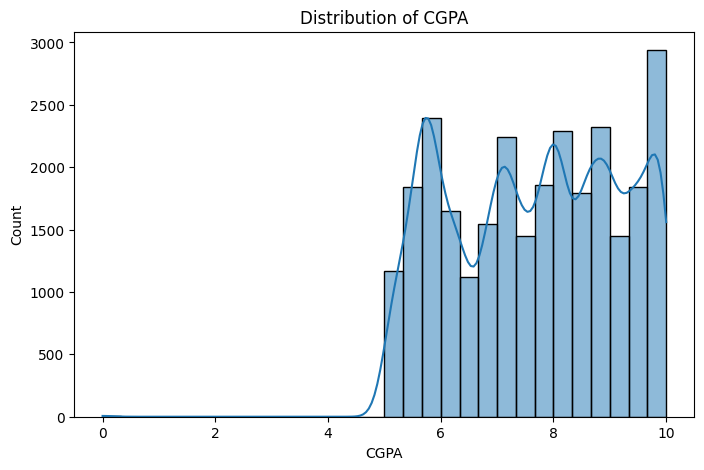

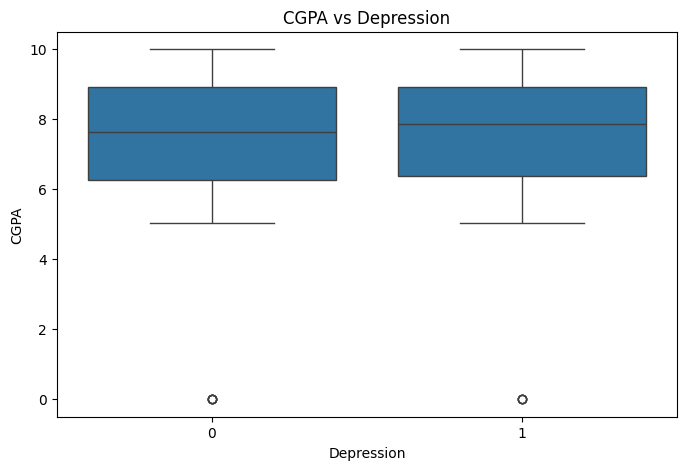

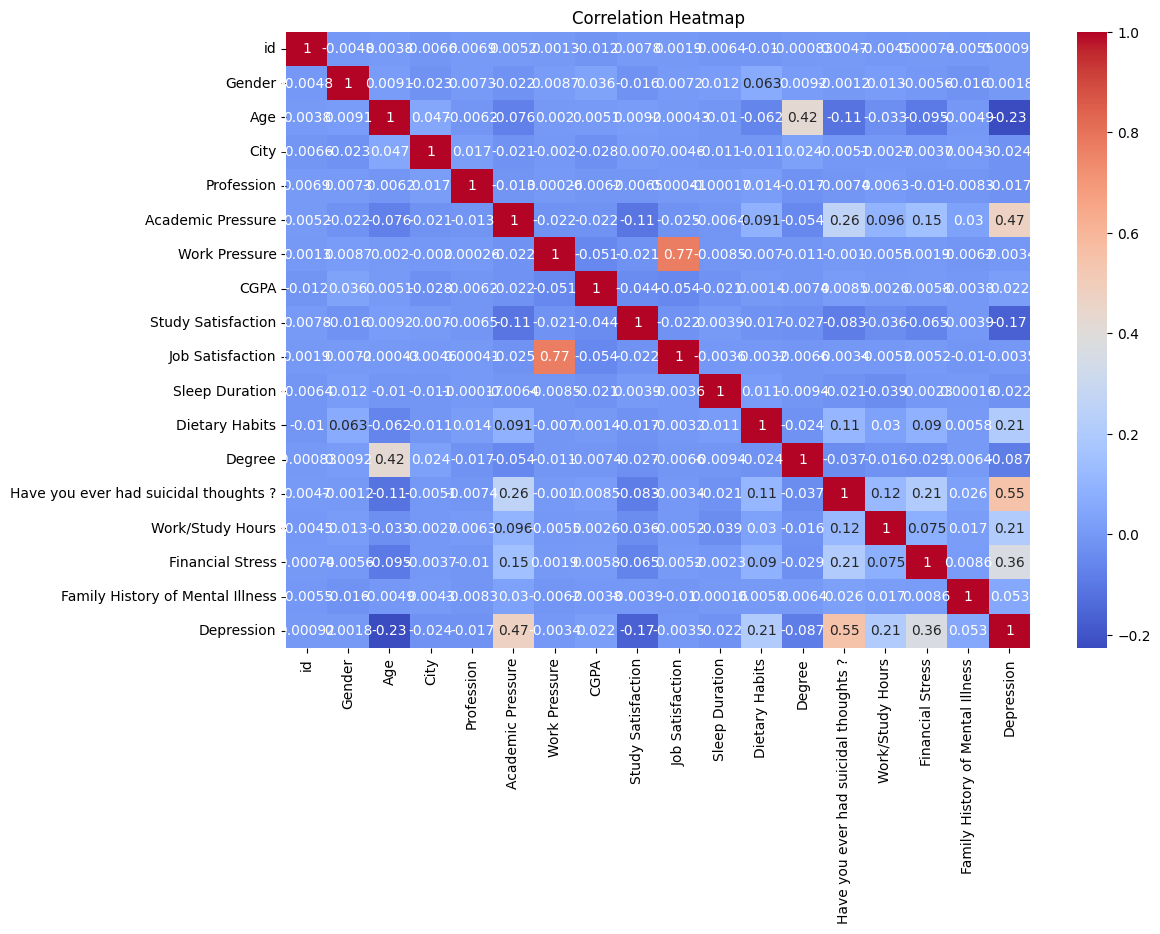

In [26]:


# Step 5: Plot distribution of CGPA
if 'CGPA' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df['CGPA'], kde=True, bins=30)
    plt.title("Distribution of CGPA")
    plt.show()

    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Depression', y='CGPA', data=df)
    plt.title("CGPA vs Depression")
    plt.show()

# Step 6: Categorical plots (only for existing columns)
df = df.dropna()
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Automatically encode all object (string) columns
label_cols = df.select_dtypes(include=['object']).columns.tolist()
label_encoders = {}

for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
# Step 7: Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Step 8: Clean + Encode categorical columns
df = df.dropna()
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Safe encoding
categorical_candidates = ['Gender', 'City', 'Occupation', 'Dietary Habits', 'Degree',
                          'Have you ever had suicidal thoughts ?',
                          'Family History of Mental Illness', 'Sleep Duration']

label_cols = [col for col in categorical_candidates if col in df.columns]
label_encoders = {}

for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Step 9: Feature-target split
X = df.drop('Depression', axis=1)
y = df['Depression']

# Step 10: Split - Train (64%) / Validation (16%) / Test (20%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.20, random_state=42)



In [27]:

# Step 11: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)



📊 Validation Set Evaluation:
Validation Accuracy: 0.8492383512544803
Confusion Matrix:
 [[1512  373]
 [ 300 2279]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.80      0.82      1885
           1       0.86      0.88      0.87      2579

    accuracy                           0.85      4464
   macro avg       0.85      0.84      0.84      4464
weighted avg       0.85      0.85      0.85      4464


🧪 Test Set Evaluation:
Test Accuracy: 0.8270919190109299
Confusion Matrix:
 [[1807  536]
 [ 429 2809]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.77      0.79      2343
           1       0.84      0.87      0.85      3238

    accuracy                           0.83      5581
   macro avg       0.82      0.82      0.82      5581
weighted avg       0.83      0.83      0.83      5581



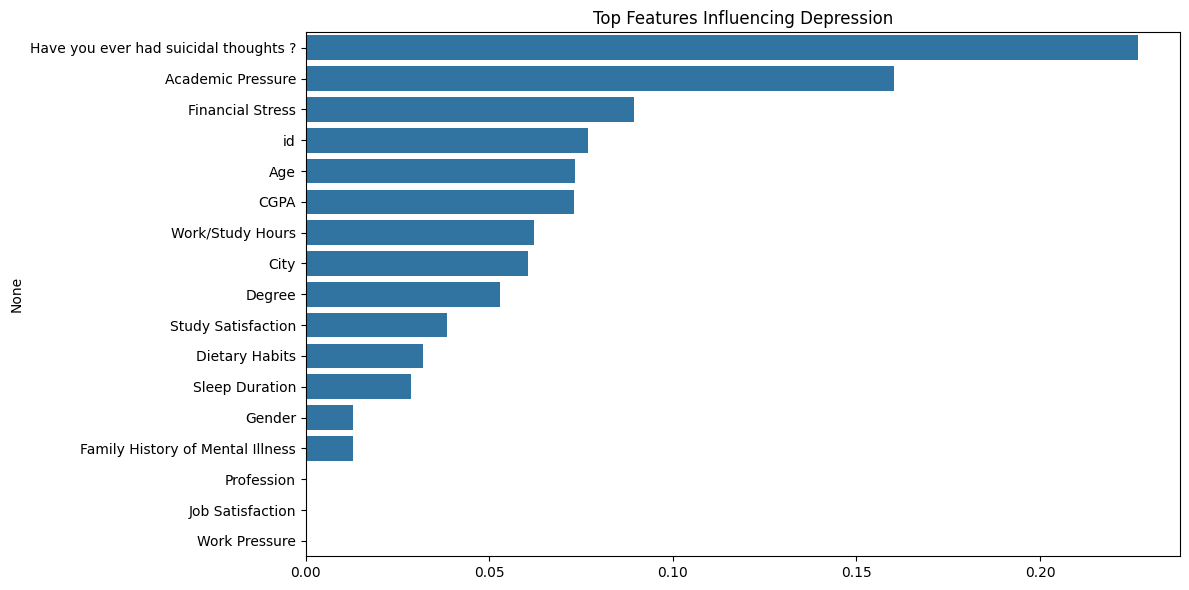


✅ Model and scaler saved successfully.


In [28]:
# Step 12: Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Step 13: Validation Evaluation
y_val_pred = model.predict(X_val_scaled)
print("\n📊 Validation Set Evaluation:")
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print("Classification Report:\n", classification_report(y_val, y_val_pred))

# Step 14: Test Evaluation
y_test_pred = model.predict(X_test_scaled)
print("\n🧪 Test Set Evaluation:")
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

# Step 15: Feature Importance
importances = model.feature_importances_
feature_names = X.columns
sorted_idx = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
sns.barplot(x=importances[sorted_idx], y=feature_names[sorted_idx])
plt.title("Top Features Influencing Depression")
plt.tight_layout()
plt.show()

# Step 16: Save model + scaler
joblib.dump(model, '/content/drive/MyDrive/Chocolate_Sale/depression_model.pkl')
joblib.dump(scaler, '/content/drive/MyDrive/Chocolate_Sale/scaler.pkl')

print("\n✅ Model and scaler saved successfully.")
